In [1]:
import sys
sys.path.append('../')
import numpy as np
from numpy import exp, log, log10, cos, sin, pi, cosh, sinh , sqrt, amin, amax, mean, dot, power
import h5py, os
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from matplotlib import pyplot as plt
import scipy, time, multiprocessing
from scipy import interpolate
from scipy.optimize import curve_fit

In [2]:
%load_ext autoreload
%autoreload 2
from relation import Scaling

In [3]:
s = Scaling('140','')

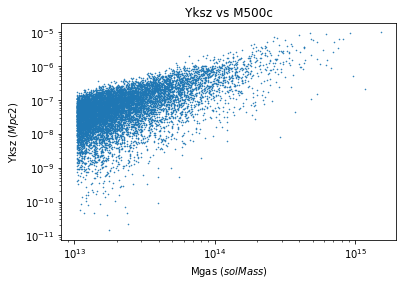

In [4]:
s.plot_Y_M()

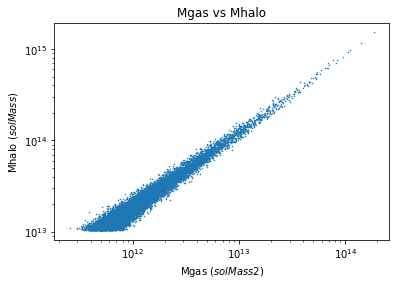

In [5]:
s.gas_halo_relation()

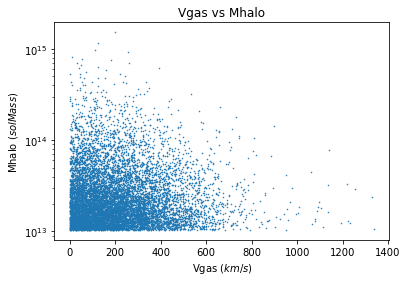

In [6]:
s.velo_halo_relation('z')

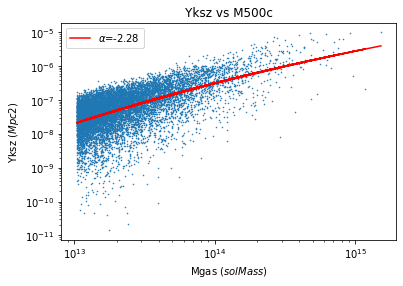

In [7]:
s.plot_Y_M_fit()

In [8]:
Y,M = s.Y_M()

In [9]:
inp = np.zeros((len(M),3))
inp[:,0] = np.log(s.Mgas.value)
inp[:,1] = np.log(s.Mstar.value)
inp[:,2] = s.Vlos.value

[]

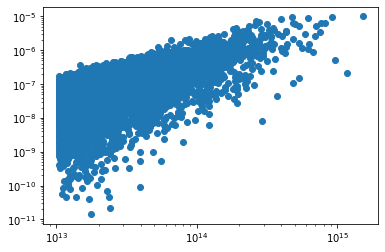

In [60]:
plt.scatter(M.value,Y.value)
plt.semilogy()
plt.semilogx()

In [12]:
regr = RandomForestRegressor(max_depth=50, random_state=0,min_samples_leaf=4,n_estimators=50,n_jobs=-1)

In [61]:
regr.fit(inp, np.log(Y.value))

RandomForestRegressor(max_depth=50, min_samples_leaf=4, n_estimators=50,
                      n_jobs=-1, random_state=0)

In [62]:
regr.feature_importances_

array([0.35074905, 0.00764853, 0.64160242])

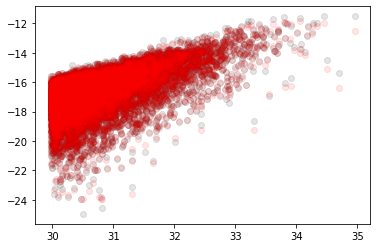

In [65]:
plt.plot(np.log(M.value),np.log(Y.value),'o',alpha=0.1,c='k')
plt.plot(np.log(M.value),regr.predict(inp),'o',alpha=0.1,c='r')

In [88]:
inp_reg = np.zeros((len(M),2))
inp_reg[:,0] = np.log(s.Mgas.value)
inp_reg[:,1] = s.Vlos.value

In [66]:
from pysr import PySRRegressor

In [100]:
model = PySRRegressor(
    niterations=40,
    binary_operators=["+", "-", "*", "/",'pow'],
    unary_operators=["neg","exp","log"],
    #denoise=True,
    procs=7,
    model_selection="best")

In [101]:
model.fit(inp_reg, np.log(Y.value),weights=np.power(s.Mhalo.value,1/2))

/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/pysr/sr.py:1743: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://astroautomata.com/PySR/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(
/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/pysr/julia_helpers.py:217: UserWarning: Julia has already started. The new Julia options {'threads': 7} will be ignored.
  warnings.warn(


PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                         -16.304266   
	1         0.323893                                   (x0 + -44.56287)   
	2         0.057284                              (log(x1) - 21.380186)   
	3        13.463084                        ((log(x1) - 49.63782) + x0)   
	4         0.097330                    (log(exp(x0) * x1) + -49.63782)   
	5         0.054061      ((log(exp(x0) * x1) + -40.66969) + -8.968131)   
	6         0.042417  (((x0 + -48.221107) - 0.5151487) - log(2.46345...   
	7         0.219093  (((log(x1) + -21.876692) - 13.006424) + (x0 - ...   
	8  >>>>   0.707796  ((((x0 + -48.04616) - log(1.2446878 / x1)) + -...   
	
	           loss  complexity  
	0  2.449905e+00           1  
	1  1.281797e+00           3  
	2  1.210435e+00           4  
	3  2.449372e-12           6  
	4  2.222210e-12           7  
	5  1.994476e-12           9  
	6  1.911646e-12          10  
	7  1.535525e-12          11  
	8  7.565976e-13          12  
]

In [102]:
model.sympy()

x0 - log(1.2446878/x1) - 49.41893364

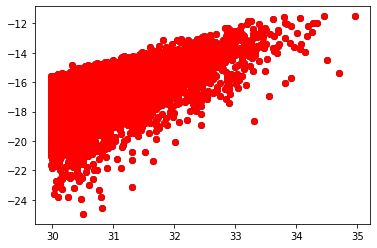

In [103]:
plt.scatter(np.log(M.value),np.log(Y.value),c='k')
plt.scatter(np.log(M.value),model.predict(inp_reg),c='r')